<a href="https://colab.research.google.com/github/Erhuvwurhire/Energy-Consumption-/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-08-01 11:35:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [     <=>            ]  19.68M  24.0MB/s    in 0.8s    

2025-08-01 11:35:54 (24.0 MB/s) - ‘household_power_consumption.zip’ saved [20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


/tmp/ipython-input-2239456529.py:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-2239456529.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-2239456529.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7xphlo2/bx5m1io0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

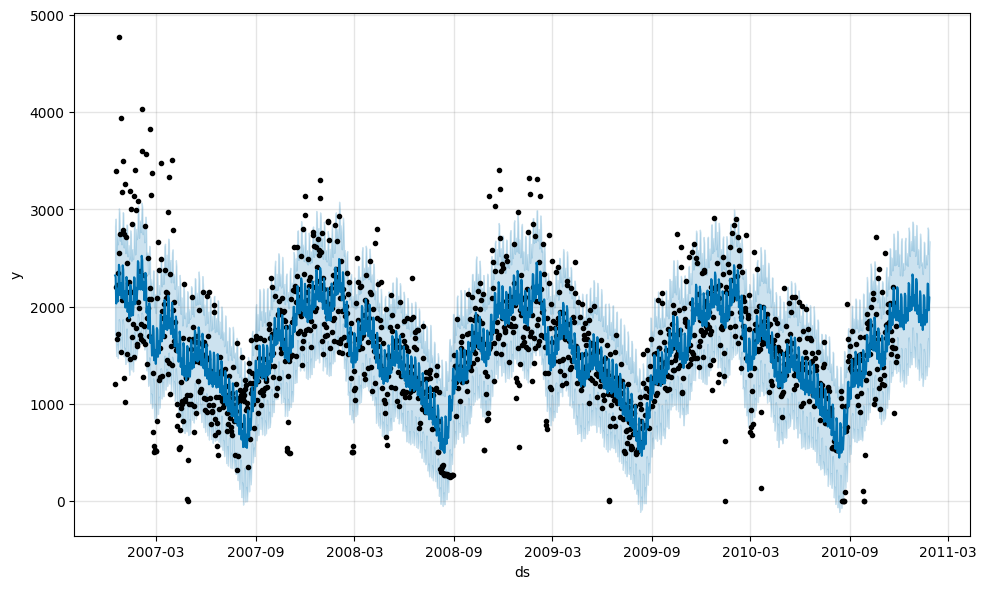

In [1]:
# Step 1: Install Prophet and unzip dataset
!pip install prophet
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

# Step 2: Load and preprocess data
import pandas as pd

# Read raw data
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True,
                 na_values=['?'],
                 low_memory=False)

# Convert to datetime and drop rows with NaNs
df.dropna(inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])

# Resample to daily energy consumption in kWh
df_daily = df.set_index('datetime').resample('D')['Global_active_power'].sum().reset_index()
df_daily.rename(columns={'datetime': 'ds', 'Global_active_power': 'y'}, inplace=True)

# Step 3: Forecast with Prophet
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(df_daily)

# Forecast 60 days into the future
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Step 4: Plot forecast
fig1 = model.plot(forecast)
